In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.shape

(891, 12)

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.drop('Cabin', axis = 1, inplace = True)

In [7]:
df['Embarked'].fillna('S', inplace=True)

In [8]:
df['Age'].fillna(np.mean(df['Age']), inplace = True)

In [9]:
# find the average fare of each class separately
fare = df.groupby('Pclass')['Fare'].mean()

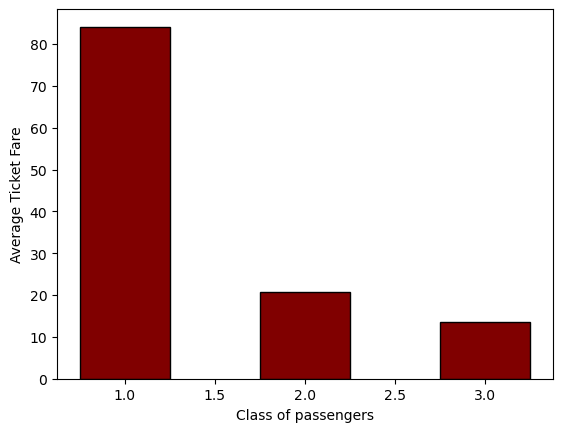

In [10]:
plt.bar(fare.index, fare.values, color='maroon', edgecolor='black', width= 0.5)
plt.xlabel('Class of passengers')
plt.ylabel('Average Ticket Fare')
plt.show()

In [11]:
sur_count = df.Survived.value_counts()
sur_count

Survived
0    549
1    342
Name: count, dtype: int64

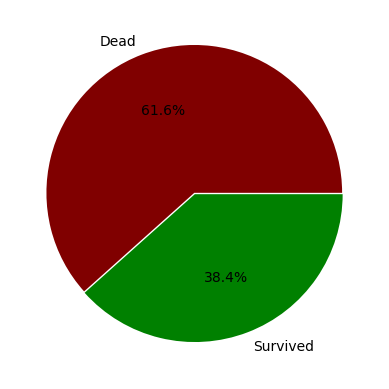

In [12]:
plt.pie(sur_count.values, labels=['Dead','Survived'], colors=['maroon','green'],autopct='%0.1f%%',explode= [0.01,0])
plt.show()

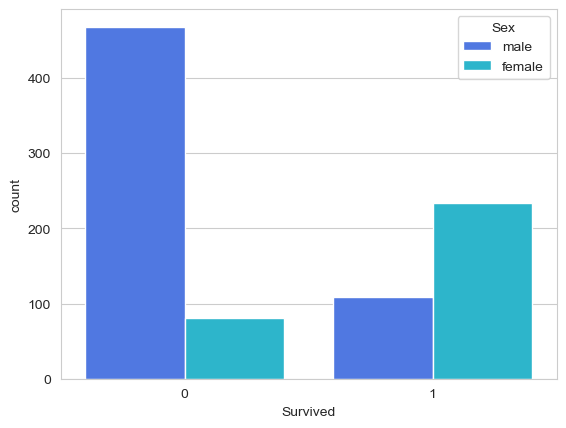

In [13]:
sns.set_style('whitegrid')
sns.set_palette('rainbow')
sns.countplot(x='Survived', hue='Sex', data= df)
plt.show()

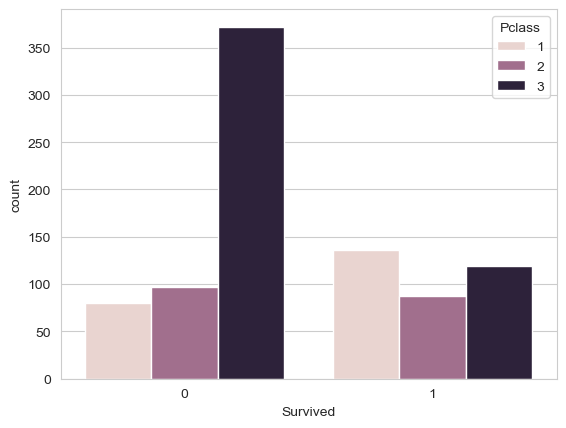

In [14]:
sns.set_style('whitegrid')
sns.set_palette('rainbow')
sns.countplot(x='Survived', hue='Pclass', data= df)
plt.show()

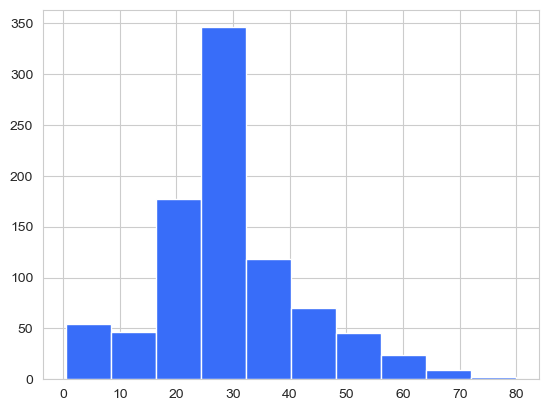

In [16]:
# Age distribution
plt.hist(df['Age'])
plt.show()

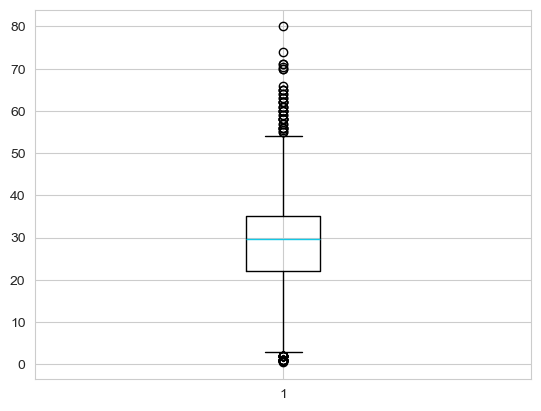

In [18]:
plt.boxplot(df['Age'])
plt.show()

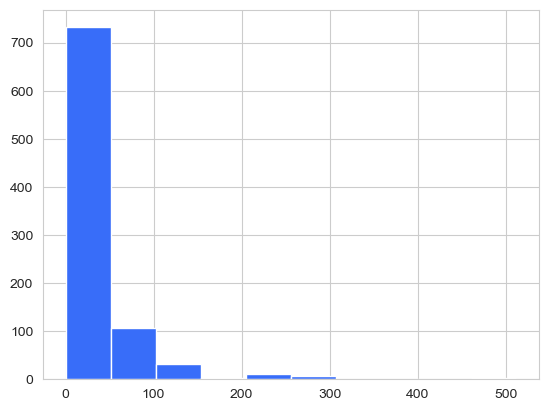

In [20]:
plt.hist(df['Fare'])
plt.show()

In [26]:
# passenger count from each class
pass_count = df['Pclass'].value_counts()
pass_count

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

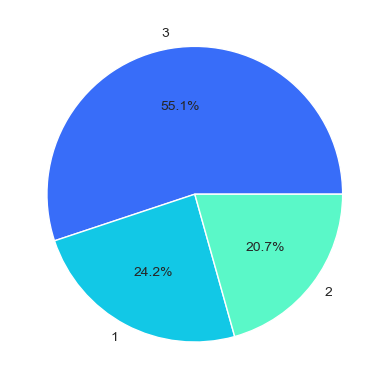

In [28]:
plt.pie(pass_count.values, labels = pass_count.index, autopct='%1.1f%%')
plt.show()

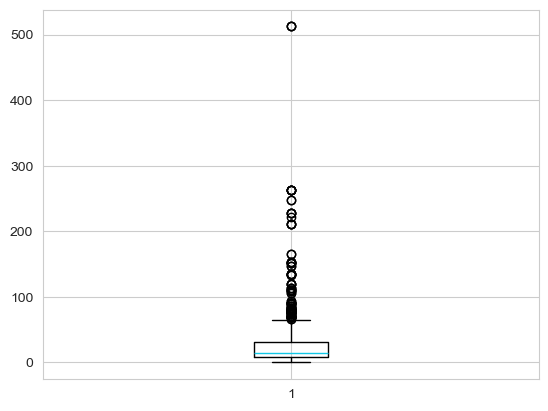

In [30]:
plt.boxplot(df['Fare'])
plt.show()

In [34]:
# average age of male and female
ave = df.groupby('Pclass')['Sex'].mean()
ave

TypeError: agg function failed [how->mean,dtype->object]